## Basic Time Analysis

#### Problem Statement:
Forecast Truck sales price based on the given time series data

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [195]:
data = pd.read_csv("Truck_sales.csv")

In [190]:
data.head()

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223


In [196]:
data.shape

(144, 2)

In [197]:
#checking null values
data.isnull().sum()

Month-Year            0
Number_Trucks_Sold    0
dtype: int64

In [198]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_Trucks_Sold,144.0,428.729167,188.633037,152.0,273.5,406.0,560.25,958.0


## Preprocessing Data

In [199]:
#converting time variable into datetime object
data['Date'] = pd.to_datetime(data['Month-Year'], format='%y-%b')
data

,Month-Year,Number_Trucks_Sold,Date
0,03-Jan,155,2003-01-01
1,03-Feb,173,2003-02-01
2,03-Mar,204,2003-03-01
3,03-Apr,219,2003-04-01
4,03-May,223,2003-05-01
...,...,...,...
139,14-Aug,933,2014-08-01
140,14-Sep,704,2014-09-01
141,14-Oct,639,2014-10-01
142,14-Nov,571,2014-11-01


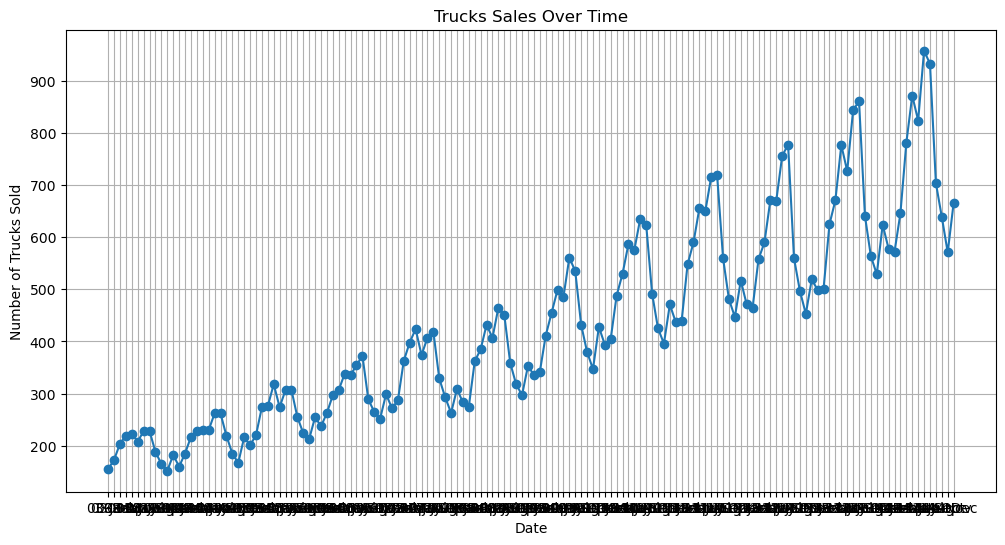

In [200]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['Month-Year'], data['Number_Trucks_Sold'], marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Trucks Sold')
plt.title('Trucks Sales Over Time')
plt.grid(True)
plt.show()

In [201]:
#we don't need Month-year variable, we have added Date variable aleady 
data.drop(columns = "Month-Year", inplace=True)
data.head()

,Number_Trucks_Sold,Date
0,155,2003-01-01
1,173,2003-02-01
2,204,2003-03-01
3,219,2003-04-01
4,223,2003-05-01


In [202]:
#checking whether any missing date
data.groupby(data["Date"])["Number_Trucks_Sold"].sum()

Date
2003-01-01    155
2003-02-01    173
2003-03-01    204
2003-04-01    219
2003-05-01    223
             ... 
2014-08-01    933
2014-09-01    704
2014-10-01    639
2014-11-01    571
2014-12-01    666
Name: Number_Trucks_Sold, Length: 144, dtype: int64

In [203]:
data["Year"]=data["Date"].dt.year
data["Month"] = data["Date"].dt.month_name()
data.head()

,Number_Trucks_Sold,Date,Year,Month
0,155,2003-01-01,2003,January
1,173,2003-02-01,2003,February
2,204,2003-03-01,2003,March
3,219,2003-04-01,2003,April
4,223,2003-05-01,2003,May


In [204]:
data.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [205]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']

## Creating a pivot table

In [ ]:
pv_table = pd.pivot_table(data= data, columns = "Month", index = "Year", values="Number_Trucks_Sold")
pv_table=pv_table[months]
pv_table

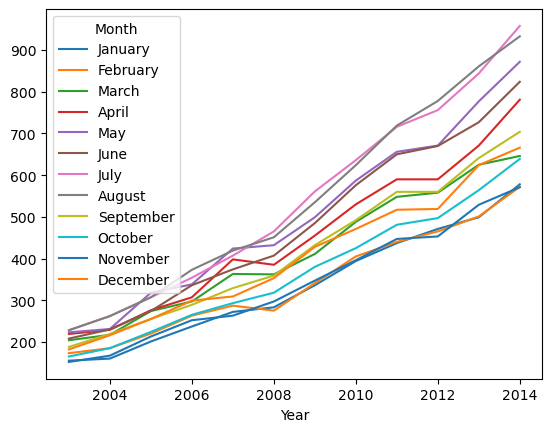

In [209]:
#visualizing sales per month
pv_table.plot(kind="line")
plt.show()

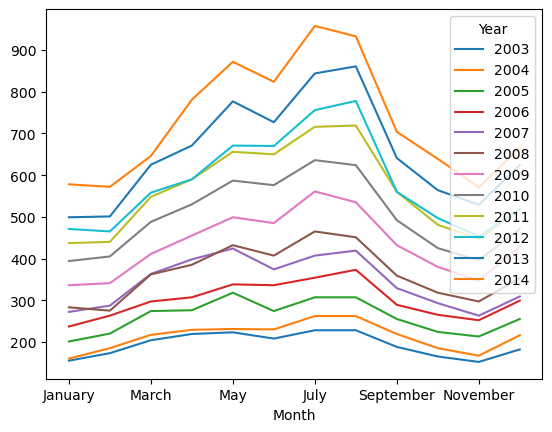

In [210]:
# transposing the plot according to year 
pv_t = pv_table.T
pv_t.plot(kind="line")
plt.show()

In [211]:
# extracting sales data
t_date = data.set_index("Date")
t_sale = t_date["Number_Trucks_Sold"]

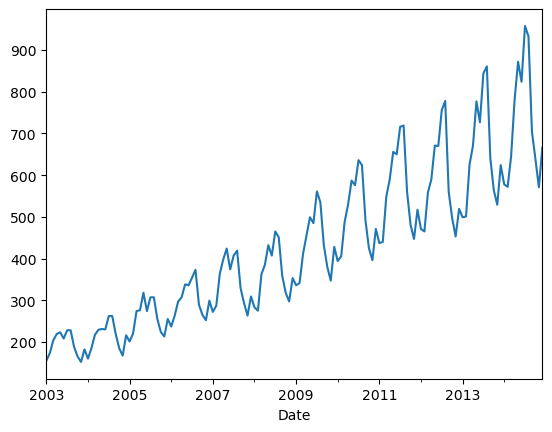

In [212]:
t_sale.plot(kind="line") #plotting trend
plt.show()

In [213]:
#setting datetime index
date_in = data.set_index(["Date"])
date_in

,Number_Trucks_Sold,Year,Month
Date,,,
2003-01-01,155,2003,January
2003-02-01,173,2003,February
2003-03-01,204,2003,March
2003-04-01,219,2003,April
2003-05-01,223,2003,May
...,...,...,...
2014-08-01,933,2014,August
2014-09-01,704,2014,September
2014-10-01,639,2014,October


In [214]:
t_sales = date_in["Number_Trucks_Sold"]
t_sales

Date
2003-01-01    155
2003-02-01    173
2003-03-01    204
2003-04-01    219
2003-05-01    223
             ... 
2014-08-01    933
2014-09-01    704
2014-10-01    639
2014-11-01    571
2014-12-01    666
Name: Number_Trucks_Sold, Length: 144, dtype: int64

## Simple moving average

In [215]:
sma_window = 5 # day window
sma = t_sales.rolling(window=sma_window).mean()
sma

Date
2003-01-01      NaN
2003-02-01      NaN
2003-03-01      NaN
2003-04-01      NaN
2003-05-01    194.8
              ...  
2014-08-01    873.6
2014-09-01    858.2
2014-10-01    811.6
2014-11-01    761.0
2014-12-01    702.6
Name: Number_Trucks_Sold, Length: 144, dtype: float64

## Exponential Moving Average

In [216]:
ema_window = 30 #day window
ema = t_sales.ewm(span = ema_window, adjust=False).mean()
ema

Date
2003-01-01    155.000000
2003-02-01    156.161290
2003-03-01    159.247659
2003-04-01    163.102648
2003-05-01    166.966994
                 ...    
2014-08-01    684.486022
2014-09-01    685.744988
2014-10-01    682.729183
2014-11-01    675.520848
2014-12-01    674.906600
Name: Number_Trucks_Sold, Length: 144, dtype: float64

## Decompositing Trends & Seasonality

In [217]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [218]:
#multiplicative decomposition
decomposed_mult = seasonal_decompose(t_sales, model = "mul", extrapolate_trend = 4)

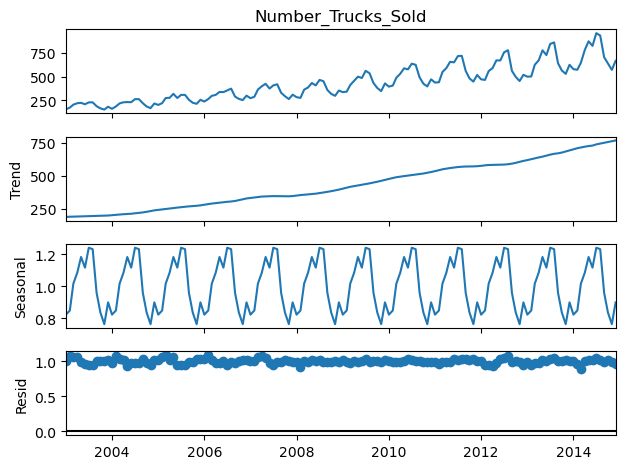

In [219]:
decomposed_mult.plot()
plt.show()

In [220]:
decomposed_mult.trend

Date
2003-01-01    188.550000
2003-02-01    189.441667
2003-03-01    190.333333
2003-04-01    191.225000
2003-05-01    192.116667
                 ...    
2014-08-01    741.954167
2014-09-01    747.891667
2014-10-01    753.829167
2014-11-01    759.766667
2014-12-01    765.704167
Name: trend, Length: 144, dtype: float64

In [221]:
mult_result = pd.DataFrame([decomposed_mult.seasonal, decomposed_mult.trend, decomposed_mult.resid, decomposed_mult.observed])
mult_result.head().T

,seasonal,trend,resid,Number_Trucks_Sold
Date,,,,
2003-01-01,0.822787,188.550000,0.999120,155.0
2003-02-01,0.848701,189.441667,1.076009,173.0
2003-03-01,1.016194,190.333333,1.054724,204.0
2003-04-01,1.084600,191.225000,1.055917,219.0
2003-05-01,1.182304,192.116667,0.981772,223.0
...,...,...,...,...
2014-08-01,1.231109,741.954167,1.021429,933.0
2014-09-01,0.958934,747.891667,0.981625,704.0
2014-10-01,0.836443,753.829167,1.013425,639.0


## Additive Model

In [228]:
decomposed_add = seasonal_decompose(t_sales, model='add', extrapolate_trend=4)

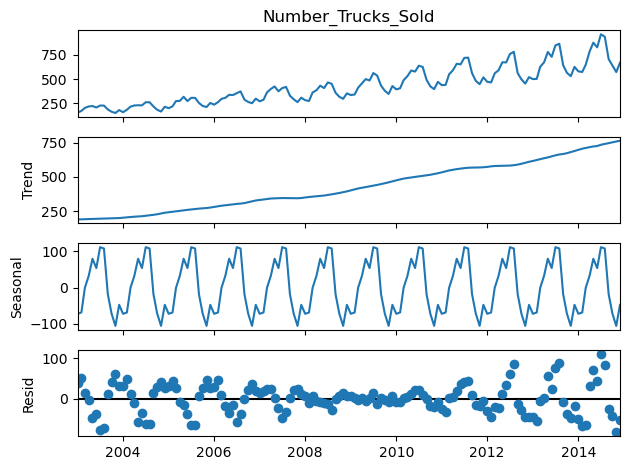

In [229]:
decomposed_add.plot()
plt.show()

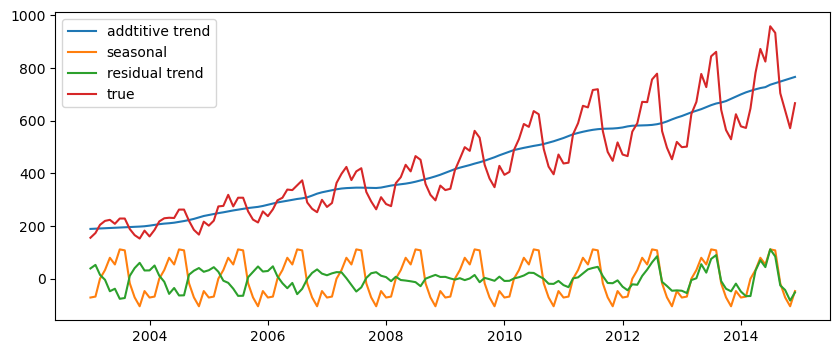

In [230]:
plt.figure(figsize=(10,4))
plt.plot(decomposed_add.trend, label='addtitive trend')
plt.plot(decomposed_add.seasonal, label='seasonal')
plt.plot(decomposed_add.resid, label='residual trend')
plt.plot(decomposed_add.observed, label="true")
plt.legend()
plt.show()

In [231]:
add_result = pd.DataFrame([decomposed_add.seasonal, decomposed_add.trend, decomposed_add.resid, decomposed_add.observed])
add_result.head().T

,seasonal,trend,resid,Number_Trucks_Sold
Date,,,,
2003-01-01,-71.994589,188.550000,38.444589,155.0
2003-02-01,-68.384867,189.441667,51.943200,173.0
2003-03-01,-0.532089,190.333333,14.198756,204.0
2003-04-01,32.456105,191.225000,-4.681105,219.0
2003-05-01,79.031105,192.116667,-48.147772,223.0
...,...,...,...,...
2014-08-01,107.148814,741.954167,83.897020,933.0
2014-09-01,-18.099450,747.891667,-25.792216,704.0
2014-10-01,-71.413686,753.829167,-43.415480,639.0


# Exponential Smoothing Method

In [232]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [226]:
#splitting data
#y_train = t_sales["2003-01-01" : "2010-01-01"]
#y_test = t_sales["2010-01-01" : "2014-01-01"]

In [236]:
# re-init data
data = pd.read_csv("Truck_sales.csv")
data['Month-Year'] = pd.to_datetime(data['Month-Year'], format='%y-%b')

# Set 'Month-Year' as the index
data.set_index('Month-Year', inplace=True)

# Sort the index (in case it's not sorted)
data.sort_index(inplace=True)

# Display the first few rows
print(data.head())

            Number_Trucks_Sold
Month-Year                    
2003-01-01                 155
2003-02-01                 173
2003-03-01                 204
2003-04-01                 219
2003-05-01                 223


In [237]:
y_train = data[:int(0.8*(len(data)))]
Ytest = data[int(0.8*(len(data))):]

In [283]:
#building model
exp_model = ExponentialSmoothing(y_train['Number_Trucks_Sold'], seasonal ="mul", trend = "mul", seasonal_periods = 12, freq="MS")

In [284]:
#fitting model
alpha = 0.1
beta = 0.1
gamma = 0.05
trained = exp_model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

## Truck price in the upcoming 12 months 

In [310]:
forecast = trained.forecast(43) #10 months forecast
forecast.tail(14)

2015-01-01    604.426622
2015-02-01    618.053532
2015-03-01    750.713108
2015-04-01    801.308736
2015-05-01    882.555279
2015-06-01    850.651614
2015-07-01    943.676551
2015-08-01    933.677511
2015-09-01    739.719111
2015-10-01    645.953594
2015-11-01    597.407920
2015-12-01    706.421623
2016-01-01    650.726840
2016-02-01    665.397597
Freq: MS, dtype: float64

In [294]:
print(f"MSE", np.mean(np.square(forecast - y_test))) #mean squared error

MSE 706.7499165190692


In [311]:
# Convert predictions to a DataFrame
predicted = pd.DataFrame(forecast, index=y_test.index, columns=['Predicted Sales'])
predicted.tail(20)

,Predicted Sales
Date,
2012-06-01,NaN
2012-07-01,NaN
2012-08-01,748.223754
2012-09-01,592.790769
2012-10-01,517.649635
2012-11-01,478.746453
2012-12-01,566.107069
2013-01-01,521.474784
2013-02-01,533.231530


## Visualizations

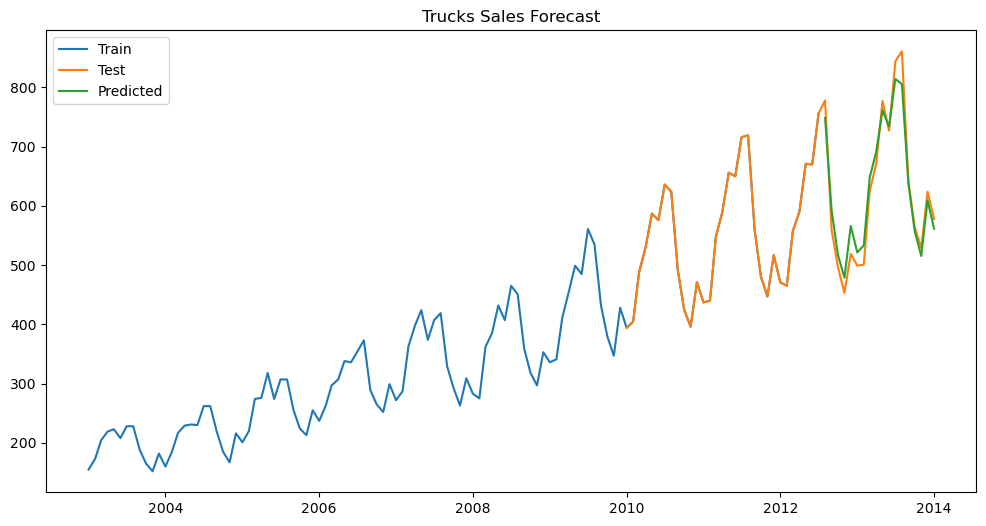

In [312]:
# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_train['Number_Trucks_Sold'], label='Train')
plt.plot(y_test, label='Test')
plt.plot(predicted, label='Predicted')
plt.legend(loc='best')
plt.title('Trucks Sales Forecast')
plt.show()


# Future Price Prediction

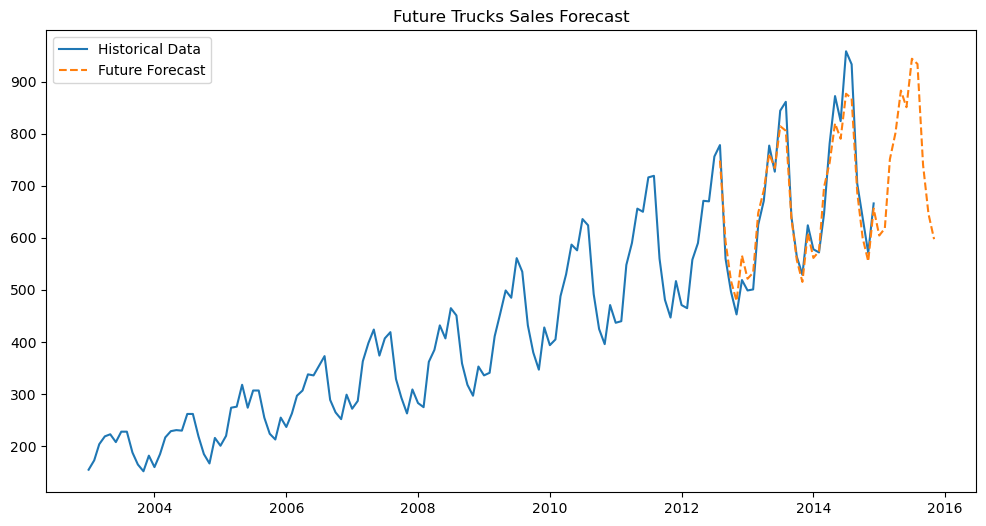

In [313]:
# Forecast for the next 12 months
future_forecast = trained.forecast(40)

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data['Number_Trucks_Sold'], label='Historical Data')
plt.plot(future_forecast, label='Future Forecast', linestyle='--')
plt.legend(loc='best')
plt.title('Future Trucks Sales Forecast')
plt.show()

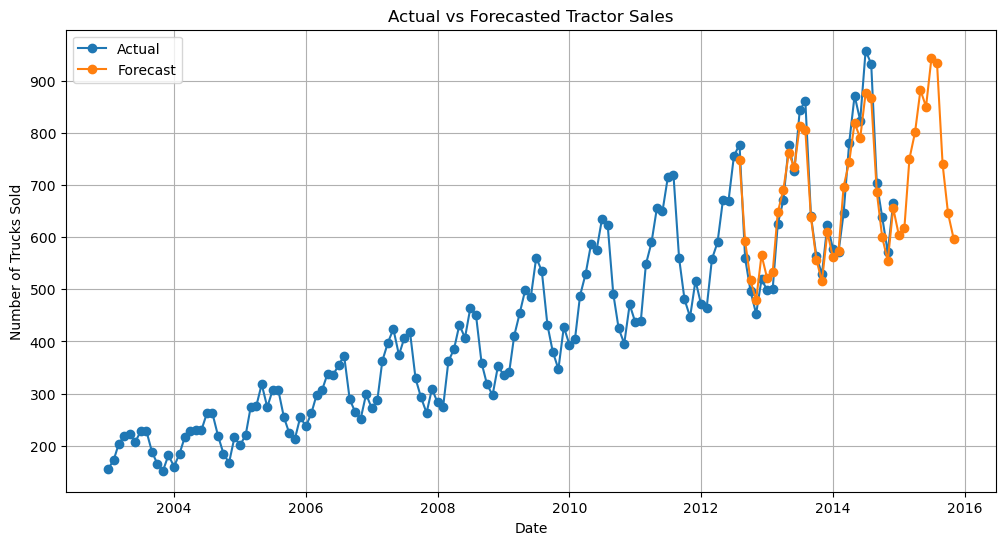

In [314]:
# Plot actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Number_Trucks_Sold'], label='Actual', marker='o')
plt.plot(future_forecast.index, future_forecast, label='Forecast', marker='o')
plt.title('Actual vs Forecasted Tractor Sales')
plt.xlabel('Date')
plt.ylabel('Number of Trucks Sold')
plt.legend()
plt.grid(True)
plt.show()